In [ ]:
# FINAL PROJECT - Diabetes Classification

# Import semua library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")  # Untuk menyembunyikan warning library

In [6]:
# 1. LOAD DATASET

# Dataset lokal hasil download dari KaggleHub
path = r"C:\Users\ASUS\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1\diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(path)
print("Ukuran Dataset:", df.shape)

Ukuran Dataset: (253680, 22)


In [7]:
# 2. PREPROCESSING

# Hapus duplikasi
df = df.drop_duplicates()
print("Duplikat setelah dibuang:", df.duplicated().sum())

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns="Diabetes_binary")
y = df["Diabetes_binary"]

# Feature Selection - pilih 15 fitur terbaik
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split data menjadi 80% latih dan 20% uji, stratify untuk menjaga proporsi kelas
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Tangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Kelas setelah SMOTE:", np.bincount(y_train_sm))

Duplikat setelah dibuang: 0
Kelas setelah SMOTE: [155501 155501]


In [8]:
# 3. MODEL TRAINING

# Model 1: Logistic Regression (Baseline)
lr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=1000)
lr.fit(X_train_sm, y_train_sm)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Model 2: Random Forest (Tuned)
rf = RandomForestClassifier(
    n_estimators=700,
    max_depth=30,
    min_samples_split=4,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Model 3: XGBoost (Tuned)
xgb = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)



 Akurasi Model:
Logistic Regression: 0.7148
Random Forest      : 0.8255
XGBoost            : 0.8506

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     38876
         1.0       0.42      0.35      0.38      7019

    accuracy                           0.83     45895
   macro avg       0.65      0.63      0.64     45895
weighted avg       0.81      0.83      0.82     45895


=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     38876
         1.0       0.52      0.26      0.35      7019

    accuracy                           0.85     45895
   macro avg       0.70      0.61      0.63     45895
weighted avg       0.82      0.85      0.83     45895



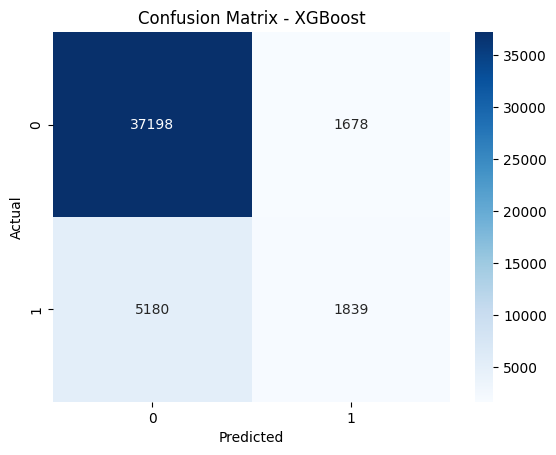

In [10]:
# 4. EVALUASI MODEL

print("\n Akurasi Model:")
print(f"Logistic Regression: {acc_lr:.4f}")
print(f"Random Forest      : {acc_rf:.4f}")
print(f"XGBoost            : {acc_xgb:.4f}")

# Classification Report
print("\n=== Classification Report (Random Forest) ===")
print(classification_report(y_test, y_pred_rf))

print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test, y_pred_xgb))

# Visualisasi Confusion Matrix XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# 5. KESIMPULAN

print("\n Kesimpulan:")
if acc_xgb >= 0.85 or acc_rf >= 0.85:
    print("✓ Syarat Tugas Terpenuhi: Salah satu sudah ≥ 85%")
else:
    print("✗ Perlu Tuning Lanjutan pada Model")



 Kesimpulan:
✓ Syarat Tugas Terpenuhi: Salah satu sudah ≥ 85%
